# Quantum Teleportation

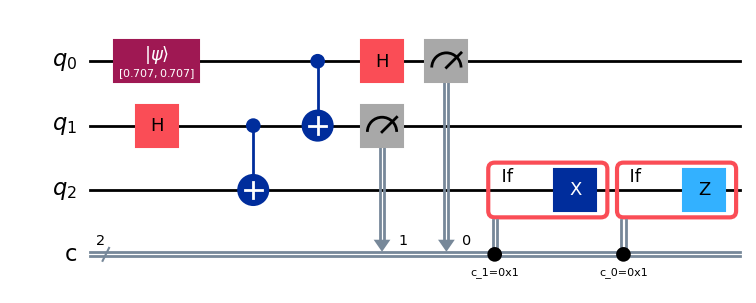

In [28]:
from qiskit import QuantumCircuit
import numpy as np

qc = QuantumCircuit(3, 2)

# Initialize the state of first qubit
qc.initialize([1/np.sqrt(2), 1/np.sqrt(2)], 0)

# Creating bell state on second and third qubit
qc.h(1)
qc.cx(1, 2)

# Creating the actual teleportation circuit
qc.cx(0, 1)
qc.h(0)

qc.measure([0, 1], [0, 1])

# Conditional corrections of Bob's qubit
with qc.if_test((1, 1)):
    qc.x(2)

with qc.if_test((0, 1)):
    qc.z(2)

qc.draw('mpl')



In [29]:
# Simulating and verifying
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, state_fidelity, partial_trace
import numpy as np

sim = AerSimulator()
qc.save_statevector()
result = sim.run(qc).result()
final_state = result.get_statevector()

# Tracing out bob's qubit
bob_state = partial_trace(final_state, [0, 1])

init_state = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
fi = state_fidelity(init_state, bob_state)
print(fi)


0.9999999999999997
